In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [2]:
BATCH_SIZE = 16
IMAGE_SIZE = 256
# Images are RGB
CHANNELS=3
EPOCHS=40

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "C:/Users/akip/Desktop/vgg16/Citrus Leaf Disease Image",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 607 files belonging to 5 classes.


In [4]:
class_names=dataset.class_names
class_names

['Black spot', 'Canker', 'Greening', 'Healthy', 'Melanose']

In [5]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(16, 256, 256, 3)
[3 1 3 2 2 1 0 3 0 0 2 2 1 0 1 2]


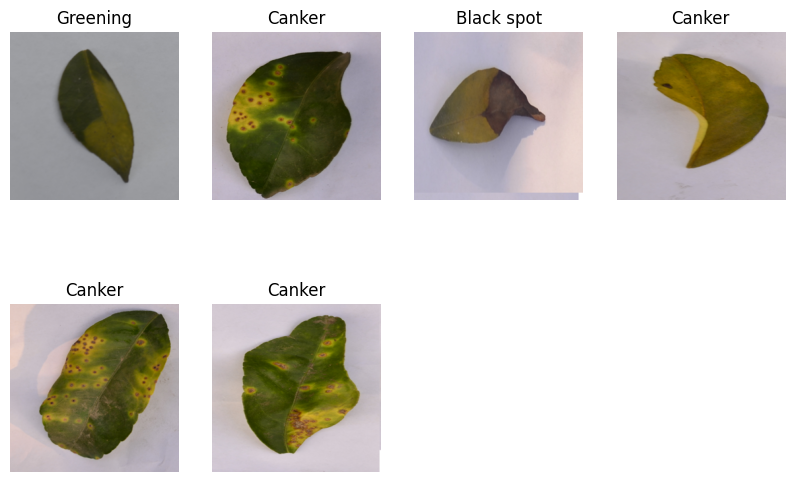

In [6]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(6):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [7]:
len(dataset)

38

In [8]:
# 80% = training
# 10% validation
# 10% test
train_size = 0.8
len(dataset)*train_size

30.400000000000002

In [9]:
15*40

600

In [10]:
train_ds = dataset.take(30)
len(train_ds)

30

In [11]:
test_ds = dataset.skip(30)
len(test_ds)

8

In [12]:
val_size=0.1
len(dataset)*val_size

3.8000000000000003

In [13]:
val_ds = test_ds.take(3)
len(val_ds)

3

In [14]:
test_ds = test_ds.skip(3)
len(test_ds)

5

In [15]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [16]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [17]:
len(train_ds)

30

In [18]:
len(val_ds)

3

In [19]:
len(test_ds)

5

In [20]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [21]:
from tensorflow.keras.layers import Resizing, Rescaling
from tensorflow import keras
# from tensorflow.keras.layers.experimental  import Resizing, Rescaling

IMAGE_SIZE = 256
resize_and_rescale = keras.Sequential([
    Resizing(IMAGE_SIZE, IMAGE_SIZE),
    Rescaling(1./255),
])


In [22]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.2),
])


In [23]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [24]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 5

In [28]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load pre-trained VGG16 model
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Assuming you have 10 disease classes
num_classes = 10

# Add the dense layer with the correct number of classes
model.add(layers.Dense(num_classes, activation='softmax'))


# Build your own model on top of VGG16
model = models.Sequential()
model.add(vgg_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))  # num_classes is the number of disease classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dataset = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=batch_size, class_mode='categorical')
valid_dataset = valid_datagen.flow_from_directory(valid_dir, target_size=(224, 224), batch_size=batch_size, class_mode='categorical')

# Train the model
model.fit(train_dataset, epochs=10, validation_data=valid_dataset)

NameError: name 'train_dir' is not defined